In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

In [4]:
import matplotlib.pyplot as plt

In [5]:
sys.path.append("/mnt/d/Rutgers/control_transition/")

In [6]:
from plot_utils import *

In [7]:
from data_collapse import *

In [207]:
# nshell=2
# L=11
# mu=1.1
# # zz=load_torch_pt(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es50_seed0_SE.pt')
# zz=load_torch_pt(f'class_A_2D_L11_nshell2_mu1.20_es50_seed0_SE.pt')

# Generate

In [21]:
L_list=range(11,23,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[3,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.3,1.8,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[4,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[5,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 96/96 [00:00<00:00, 15888.77it/s]


# Load

In [41]:
np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2))

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.7 , 1.8 , 1.9 , 2.  , 2.1 ])

In [46]:
np.linspace(1.1,2.1,21)

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ])

In [108]:
L_list=range(11,21,2)


In [149]:
L_list=range(11,25,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'nshell':[2,3,4,5],'mu':np.linspace(1.1,2.1,21)}),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
data_0_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_dict,
        data_dict_file=None, 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/588 [00:00<?, ?it/s]

generate_params: 100%|██████████| 588/588 [00:02<00:00, 283.34it/s]


In [46]:
def plot_raw(nshell,df,metrics='Chern',ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$','EE':'$S_1/2$'}
    metrics_text = {'Chern':'C','TMI':'TMI','EE':'EE'}
    L_list=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(0,level='seed0').xs(0,level='sigma').index.get_level_values('L').unique())
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
    for L in L_list:
        data=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
        mu_list_1 = data.index
        data_mean = data.apply(np.mean)
        data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
        ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list),lw=1)
    ax.legend(frameon=False)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(metrics_label[metrics])
    
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}.pdf',)

In [38]:
def plot_datacollapse(dc,nshell,metrics='Chern',ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$'}
    metrics_text = {'Chern':'C','TMI':'TMI'}
    dc.plot_data_collapse(ax=ax,s=10)
    ax.grid(False)
    ax.legend().remove()
    ax.set_xlabel(r'$(\mu-\mu_c)L^{1/\nu}$')
    ax.set_ylabel(metrics_label[metrics])
    ax.set_title(fr'$\mu_c={dc.p_c:.3f}\pm{dc.res.params["p_c"].stderr:.3f}, \nu={dc.nu:.3f}\pm{dc.res.params["nu"].stderr:.3f}$')
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}_FSS.pdf',)

# Data

## nshell 2

In [150]:
df_0['observations'].xs('Chern',level='Metrics').xs(2,level='nshell').xs(0,level='seed0').xs(0,level='sigma').xs(1.4,level='mu')
# .apply(np.mean)

L
11    [-0.719481441899158, -0.7244248668750279, -0.7...
13    [-0.7297429606948017, -0.4843418020577623, -0....
15    [-0.7272991326420594, -0.4815004529376559, -0....
17    [-0.7160753666482607, -0.7147481310961038, -0....
19    [-0.6991169349250386, -0.7036450923674367, -0....
Name: observations, dtype: object

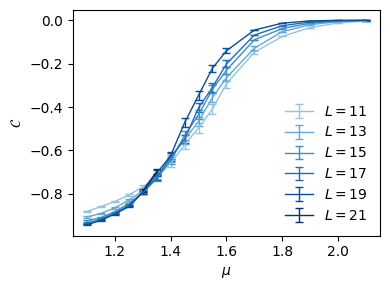

In [151]:
plot_raw(nshell=2,df=df_0,save=True)

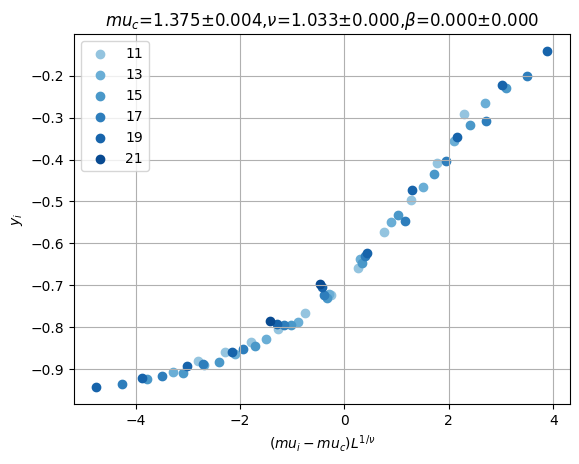

In [153]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':2},Lmin=11,Lmax=21,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()


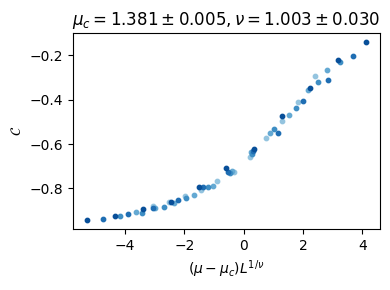

In [58]:
plot_datacollapse(dc,nshell=2,save=True,metrics='Chern')

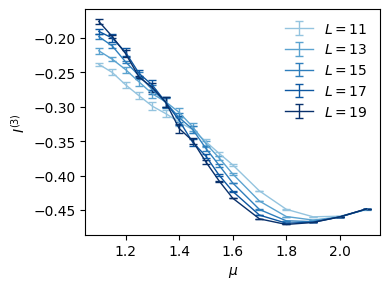

In [59]:
plot_raw(nshell=2,df=df_0,save=True,metrics='TMI')

(-0.35, -0.25)

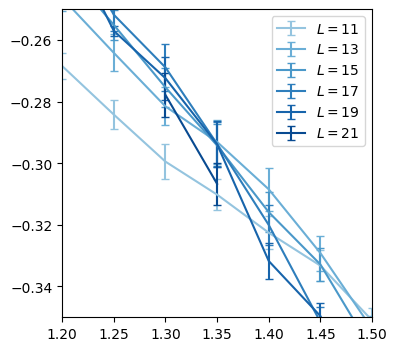

In [155]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
ax.set_xlim(1.2,1.5)
ax.set_ylim(-.35,-.25)

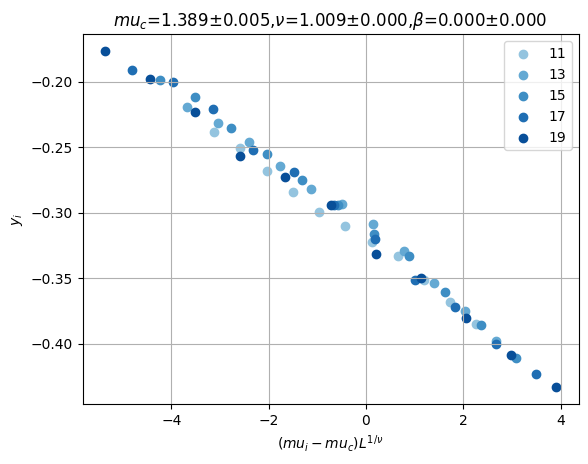

In [60]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

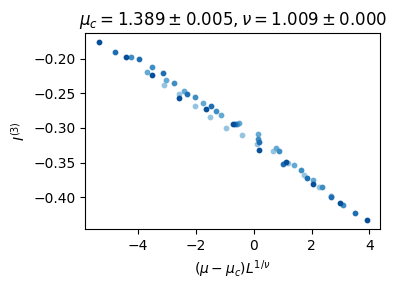

In [61]:
plot_datacollapse(dc,nshell=2,save=True,metrics='TMI')

## nshell 3

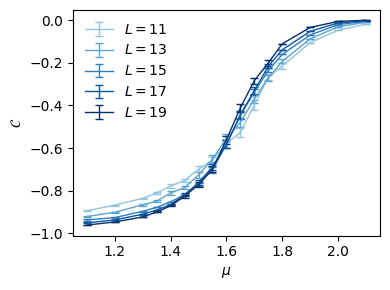

In [62]:
plot_raw(nshell=3,df=df_0,save=True)

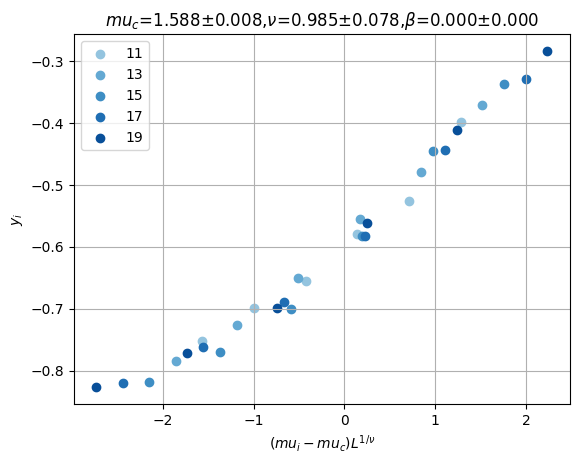

In [78]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.7],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.59,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

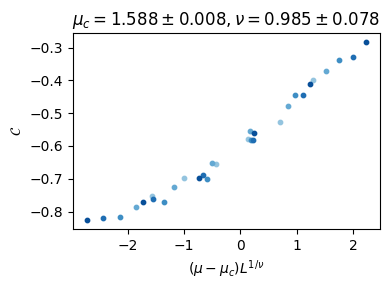

In [64]:
plot_datacollapse(dc,nshell=3,save=True,metrics='Chern')

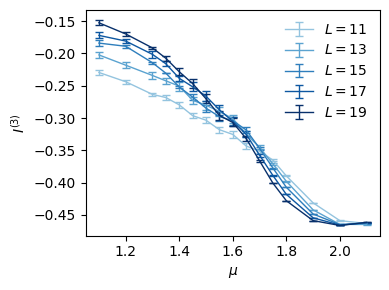

In [65]:
plot_raw(nshell=3,df=df_0,save=True,metrics='TMI')

(-0.35, -0.25)

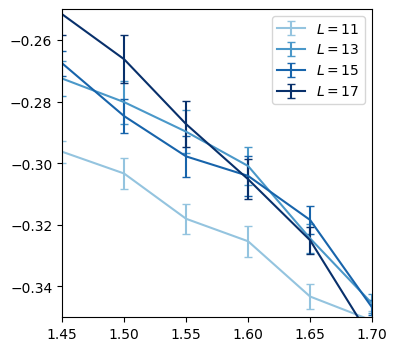

In [119]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
ax.set_xlim(1.45,1.7)
ax.set_ylim(-.35,-.25)

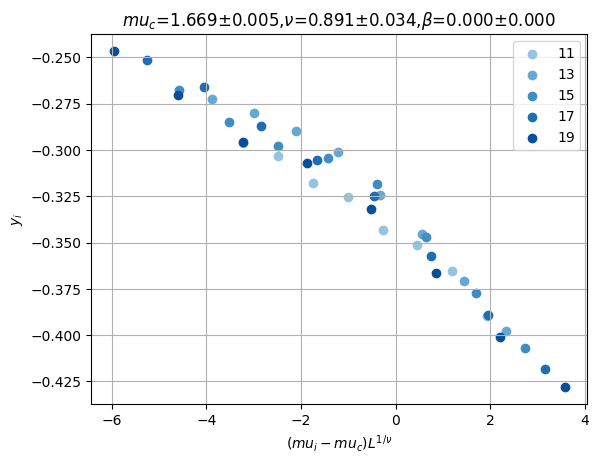

In [79]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.8],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.59,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

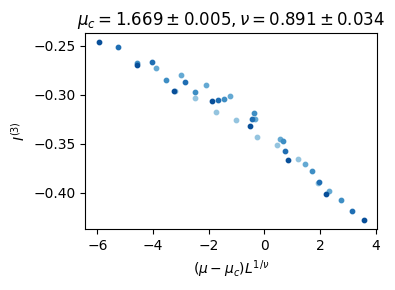

In [80]:
plot_datacollapse(dc,nshell=3,save=True,metrics='TMI')

## nshell = 4

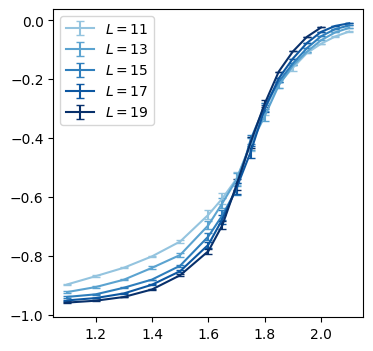

In [81]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()

# ax.set_xlim([1.6,2.1])
# ax.set_ylim([-0.8,0])

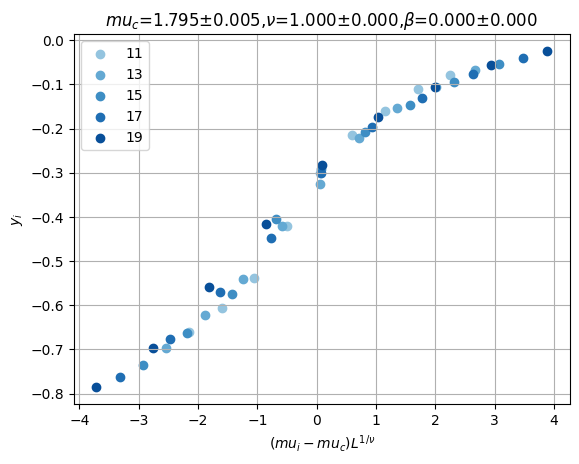

In [82]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.76,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

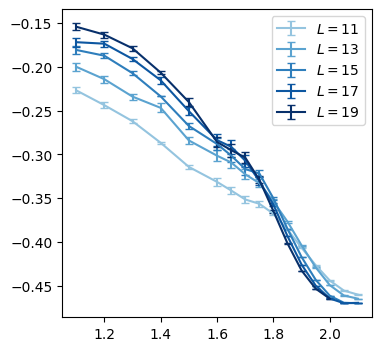

In [83]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


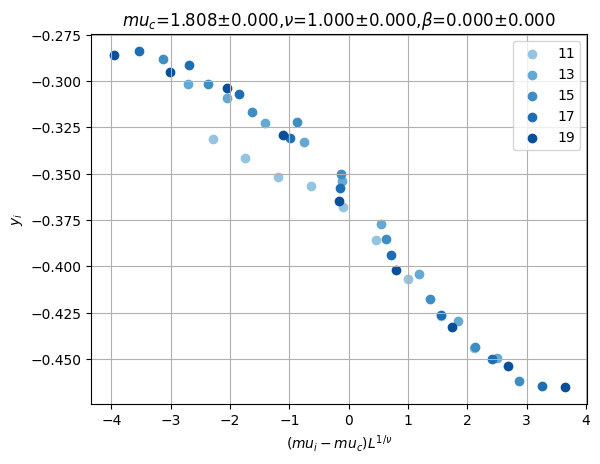

In [84]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

In [250]:
dc.res

## nshell =5

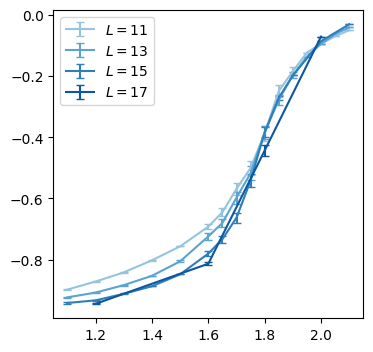

In [85]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


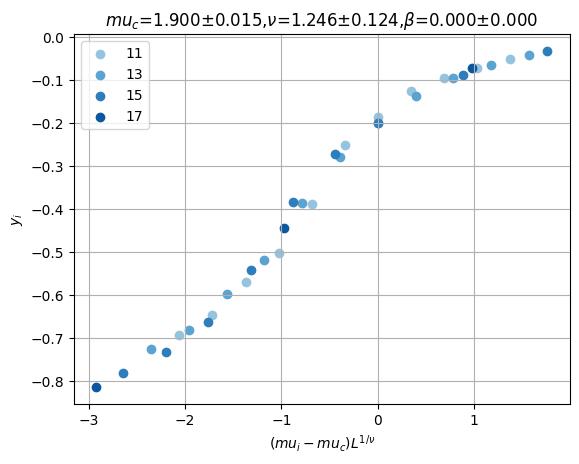

In [86]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':5},Lmin=11,Lmax=17,p_range=[1.6,2.1],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

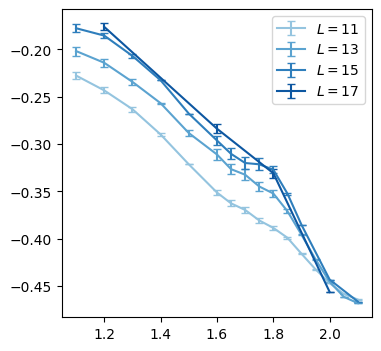

In [88]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


In [ ]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

In [ ]:
You can check what happened for "19 1.30 2", and seed = 4

[hp636@amarel2 GTN]$ cat 25.err
100%|██████████| 19/19 [03:48<00:00, 12.04s/it]
100%|██████████| 19/19 [03:49<00:00, 12.06s/it]
100%|██████████| 19/19 [03:49<00:00, 12.10s/it]
100%|██████████| 19/19 [03:49<00:00, 12.07s/it]

In [204]:
np.round(np.unique(np.hstack([np.linspace(0,0.1,21)[1:], np.linspace(0,1,11)[2:]])),3)

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 1.   ])

# Load sigma_list

## Generate

In [22]:
L_list=range(11,19,2)
params_list=[
# ({'es':'250','sigma':0},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'250','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 84/84 [00:00<00:00, 19086.71it/s]


In [8]:
np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  ,
       0.8  , 0.9  , 1.   ])

In [24]:
13792.6451/3600*4

15.325161222222222

In [138]:
L_list=range(11,21,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
({'es':'300','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
]
data_1_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_1_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_1_dict,
        data_dict_file=None, 
    )


df_1=convert_pd(data_1_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 105/105 [00:01<00:00, 62.54it/s]


Text(0, 0.5, '$\\mathcal{C}$')

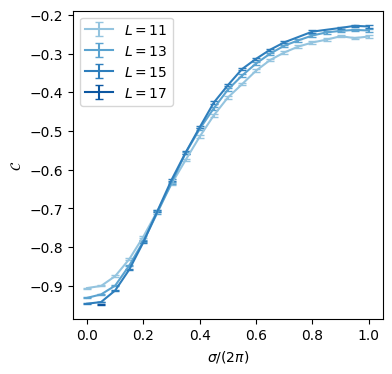

In [139]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    # data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([0.2,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel('$\mathcal{C}$')

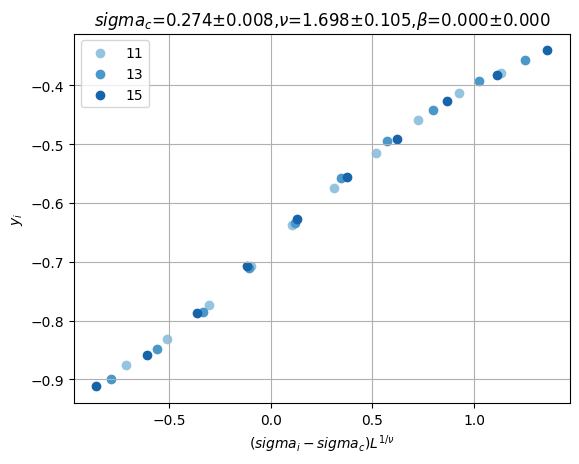

In [140]:
dc=DataCollapse(df=df_1,params={'Metrics':'Chern','seed0':0,'nshell':2,'mu':1},Lmin=11,Lmax=17,p_range=[0.1,0.6],p_='sigma',L_='L')
dc.datacollapse(nu=1.,p_c=.301,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=True)
dc.plot_data_collapse()

In [301]:
np.linspace(0.25,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [120]:
np.linspace(0,1,11)[2:]

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

# Load as a function of L

In [143]:
L_list=range(11,23,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
({'es':'200','mu':1.38,'sigma':0},{'L':L_list,'nshell':[2]}),
({'es':'200','mu':1.58,'sigma':0},{'L':L_list,'nshell':[3]}),
]
data_2_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_2_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_2_dict,
        data_dict_file=None, 
    )


df_2=convert_pd(data_2_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/6 [00:00<?, ?it/s]

generate_params: 100%|██████████| 6/6 [00:00<00:00, 170.32it/s]


In [109]:
def plot_L_raw(nshell,df,metrics='Chern',normL=False,ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$','EE':'$S_{1/2}$'}
    metrics_text = {'Chern':'C','TMI':'TMI','EE':'EE'}
    mu_list=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(0,level='seed0').xs(0,level='sigma').index.get_level_values('mu').unique())
    print(mu_list)
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
    for mu in mu_list:
        data=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(mu,level='mu').xs(0,level='seed0').xs(0,level='sigma'))
        L_list_1 = data.index
        data_mean = data.apply(np.mean)
        data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
        if normL:
            data_mean = data_mean/L_list_1
            data_sem = data_sem/L_list_1
        ax.errorbar(L_list_1,data_mean,yerr=data_sem,label=f'$\mu={mu}$',capsize=3,color=next(color_list),lw=1)
    ax.legend(frameon=False)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(metrics_label[metrics])
    
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}.pdf',)

In [146]:
df_2

observations
Metrics L  nshell mu   sigma seed0                                                   
EE      11 2      1.38 0.0   0      [14.688025162173636, 14.665475882671638, 14.66...
        13 2      1.38 0.0   0      [17.327897436513286, 17.323071288093143, 17.93...
        15 2      1.38 0.0   0      [19.985372092726315, 19.998669181147104, 19.98...
        17 2      1.38 0.0   0      [22.66302665510351, 22.667054089377398, 22.645...
        19 2      1.38 0.0   0      [25.931026397132495, 25.32782319767897, 25.319...
        11 3      1.58 0.0   0      [13.363190250986905, 13.871623889058807, 13.36...
        13 3      1.58 0.0   0      [15.794514827909731, 15.794537118244321, 15.79...
        15 3      1.58 0.0   0      [18.222287624164416, 18.22255332120862, 18.223...
        17 3      1.58 0.0   0      [20.652662003435296, 20.65281896930733, 20.654...
        19 3      1.58 0.0   0      [23.08668506695432, 23.676257844970216, 23.089...
        21 3      1.58 0.0   0      [25.52814113983767, 25.536154961043245, 26.099...

Float64Index([1.38], dtype='float64', name='mu')


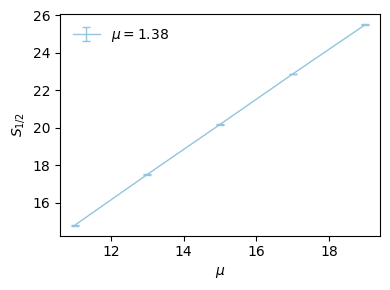

In [113]:
plot_L_raw(nshell=2,df=df_2,metrics='EE')

Float64Index([1.38], dtype='float64', name='mu')


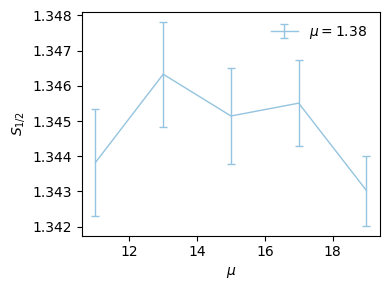

In [114]:
plot_L_raw(nshell=2,df=df_2,metrics='EE',normL=True)

Float64Index([1.58], dtype='float64', name='mu')


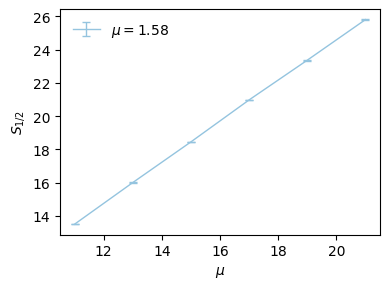

In [119]:
plot_L_raw(nshell=3,df=df_2,metrics='EE')

Float64Index([1.58], dtype='float64', name='mu')


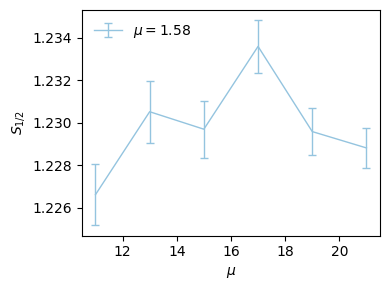

In [120]:
plot_L_raw(nshell=3,df=df_2,metrics='EE',normL=True)